# INTRODUCTION
In this Notebook we will pick up a dataset on Diabetes to expolore data analyis and Machine Learning.

I have used the Prima Indian Diabetes dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. The link to the dataset can be found on my Github.

The problem at hand is to be able to detect and predict weather a person has Diabetes or not, based on other available parameters like Body Mass Index, Insulin levels, etc. This is a classification problem and would require a machine learning model to predict Diabetes.

Another interesting insight from this problem could be to see on which parameter does Diabetes depend the most.

The Entire notebook is divided into two stages namely Data Science and Machine Learning.
The plan is to derive Insights from the data, analysis the insights and creating a ML model to the maximum of our capacity.

### **STAGE ONE: DATA SCIENCE** ###
(DATA ANALYTICS & EDA)

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
data=pd.read_csv('/content/diabetes.csv')
df=data.copy()
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
6,3,78,50,32,88,31.00,0.25,26,1
7,10,115,0,0,0,35.30,0.13,29,0
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1


In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

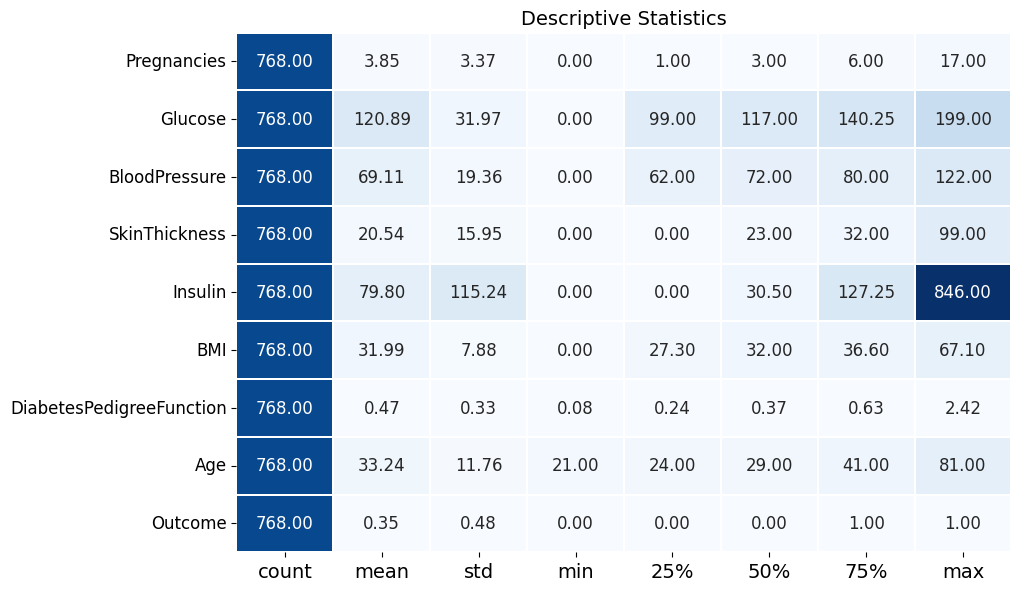

In [ ]:
# describe the data
cols=df.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(cols)

In [ ]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='winter_r').set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [ ]:
# check for class imbalance
px.histogram(df, x='Outcome', color='Outcome', title='Class Imbalance', width=500, height=500,
             template='plotly_dark', color_discrete_sequence=['#F63366', '#00CC96'])

In [ ]:
# check for missing values

def missing_values(dataframe):

    total = dataframe.isnull().sum().sort_values(ascending = False)
    percent = (dataframe.isnull().sum() / dataframe.isnull().count() * 100).sort_values(ascending = False)
    missing_values = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    print("Missing Values")
    display(missing_values.head(10))
missing_values(df)

Missing Values


,Total,Percent
Pregnancies,0,0.00
Glucose,0,0.00
BloodPressure,0,0.00
SkinThickness,0,0.00
Insulin,0,0.00
BMI,0,0.00
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,0,0.00


In [ ]:
# filling zeros with nan values

def zerotonan(data):
    data['Glucose'] = data['Glucose'].replace(0, np.nan)
    data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
    data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
    data['Insulin'] = data['Insulin'].replace(0, np.nan)
    data['BMI'] = data['BMI'].replace(0, np.nan)
    return data

zerotonan(df)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,NaN,33.60,0.63,50,1
1,1,85.00,66.00,29.00,NaN,26.60,0.35,31,0
2,8,183.00,64.00,NaN,NaN,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [ ]:
# plotting numerical variables distribution:


colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']

num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

def num_summary(dataframe, col_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Quantiles','Distribution'))

    fig.add_trace(go.Histogram(x = dataframe[col_name],
                               xbins = dict(start = dataframe[col_name].min(),
                                            end = dataframe[col_name].max()),
                               showlegend = False,
                               name = str(col_name),
                               marker=dict(color=colors[8],
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 1)

    fig.add_trace(go.Box(y=dataframe[col_name],
                         name = str(col_name),
                         showlegend = False,
                         marker_color = colors[3]),
                  row = 1, col = 2)



    fig.update_layout(title = {'text': col_name,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark")

    iplot(fig)

for i in num_cols:
    num_summary(df,i)

Text(0.5, 1.0, 'Distribution of all Variables')

<Figure size 2000x2000 with 0 Axes>

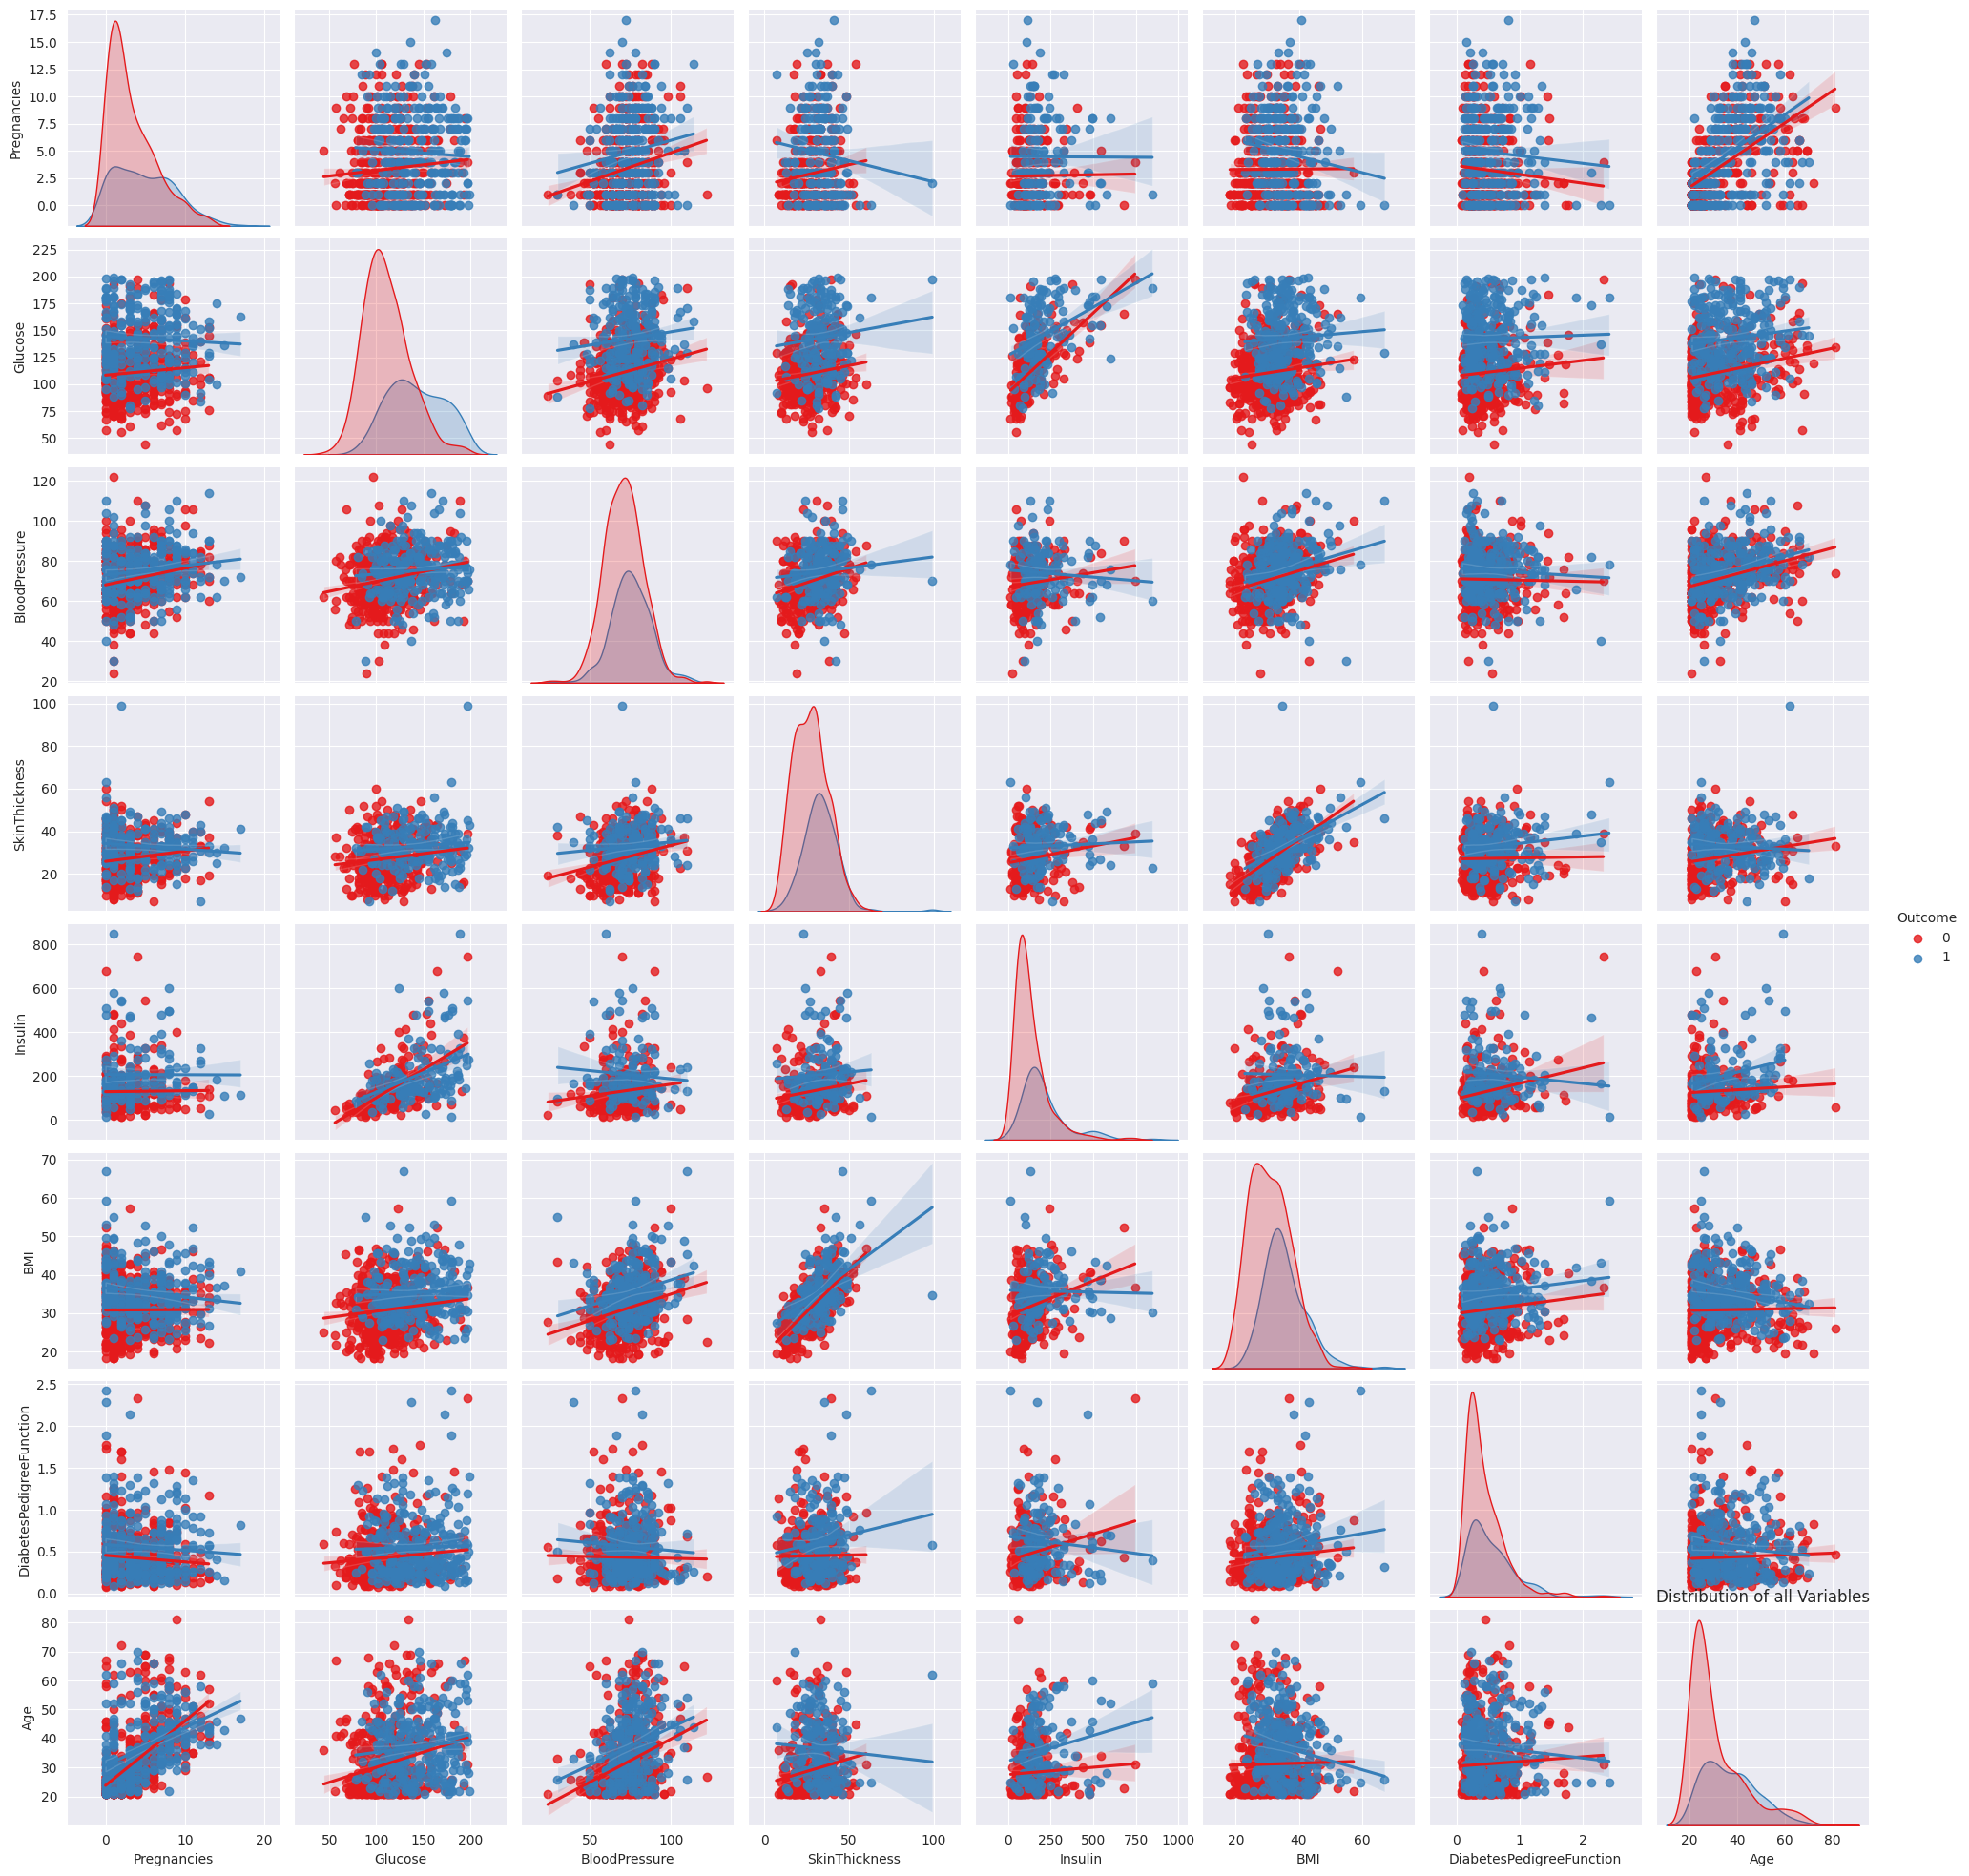

In [ ]:
# distribution of all variables:
plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
sns.pairplot(df,hue="Outcome",kind="reg",palette="Set1")
plt.title("Distribution of all Variables")

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


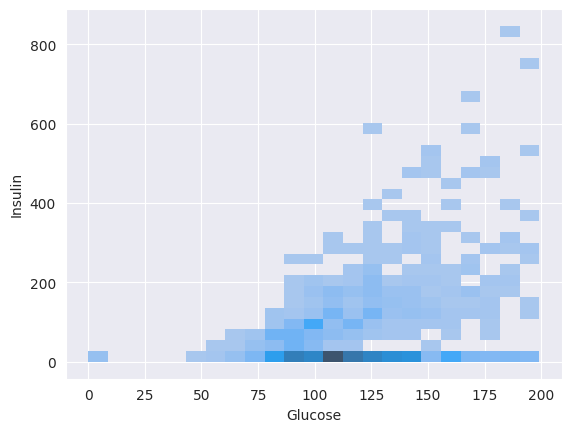

In [ ]:
sns.histplot(x='Glucose',y='Insulin', data=data)
plt.show()

<Axes: >

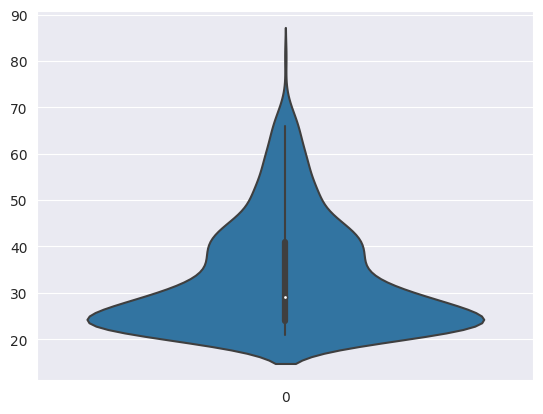

In [ ]:
sns.violinplot(data['Age'])

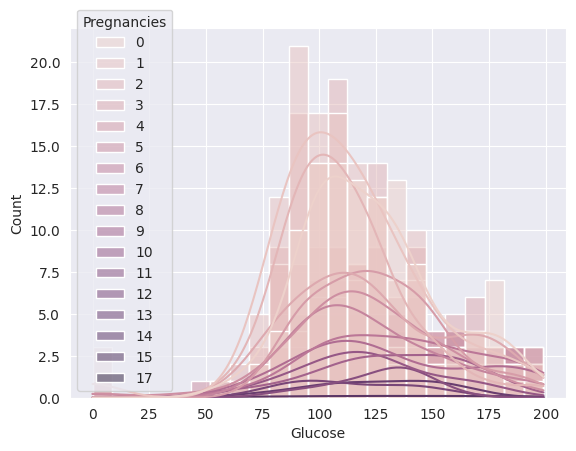

In [ ]:
sns.histplot(x='Glucose', data=data, kde=True, hue='Pregnancies')
plt.show()

### **STAGE TWO: MACHINE LEARNING**
DIABETES PREDICTION BY SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y, random_state=2)

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
input_data = (4,110,92,0,0,37.6,0.191,30) #from notepad diabetes.csv

# change the input array to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is Not Diabetic')
else:
    print('The person is Diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is Not Diabetic


### CONCLUSION

Diabetes is a serious disease in our society. It is very common in developing nations. In India, it is said that nearly 7% of the adult populaiton has diabetes and it is commonly found in my family as well. A Machine learning model, if used in the right manner could help in detecting symptoms that lead up to Diabetes. This could have tremendous health and cost benefits to the users.

From our Model we are able to predict with Diabetes with 78% accuracy. It is also important to note that the 2 most important factors while detecting diabetes are:

1. Glucose
2. Body Mass Index


### References

1. https://www.kaggle.com/uciml/pima-indians-diabetes-database

2. https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/
